In [1]:
from glob import glob
import tensorflow as tf

2024-04-30 06:00:22.313216: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-30 06:00:22.439088: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-30 06:00:23.210329: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/nccl2/lib:/usr/local/cuda/extras/CUPTI/lib64:/usr/lib/

In [2]:

#creating your glob address identifiers
path_ = [ i for i in glob('runs/*/*/*Cos*/*/events*') if not("Trial"  in i)]

In [3]:

dict_ = dict({})

note = 1
counter = 1
for path_sel in path_:
    for event in tf.compat.v1.train.summary_iterator(path_sel):
        
        if len(event.summary.value)>0:
            for value in event.summary.value:
                #print(value)
                if value.tag == 'Model Type/text_summary':
                #    shifted_step = 0
                    note = value.tensor.string_val[0].decode("utf-8")
                    
                    if note in dict_:
                        note = note+'_'+str(counter)
                        counter +=1
                    else:
                        counter = 1
                    dict_[note] = dict({'address': path_sel})

                elif note !=1:
                    #print(note)
                    if value.tag in dict_[note]:
                        dict_[note][value.tag]['value'].append(value.simple_value)
                        dict_[note][value.tag]['step'].append(event.step)
                        dict_[note][value.tag]['wall_time'].append(event.wall_time)
                    else:
                        dict_[note][value.tag] ={'value': [value.simple_value],
                                                'step':[event.step],
                                                'wall_time':[event.wall_time]}
            #raise Error
                    #print(value)

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


In [ ]:
#0-24 - WD_6
#runs/2024-04-24/3000_data_instances/vit_b_8_WD_b0_1_h0_2_att_only_M0_LR_0_001_BS_32/01-00-34/
#25-34 - WD_6_b
#runs/2024-04-24/3000_data_instances/vit_b_8_WD_b0_1_h0_2_att_only_M0_LR_0_001_BS_32_extended/08-07-09/

#35-44 - WD_6_b second run
#runs/2024-04-24/3000_data_instances/vit_b_8_WD_6_extended_WD_0_01_0_1_LR_0_0002_ext/12-00-39/
#45-64 - WD_6_c
#runs/2024-04-24/3000_data_instances/vit_b_8_WD_6_b_extended_WD_0_01_0_1_LR_0_0002_ext/15-24-19/

#65- 71 - WD_6_d [not counting for results]
#runs/2024-04-25_WD_exp6_b_c/3000_data_instances/vit_b_8_WD_6_c_extended_WD_0_01_0_1_LR_0_0002_ext/00-55-07/

In [4]:
dict_2 = dict({})

for i,j in dict_.items():
    if len( j.keys())>1:
        dict_2.update({i:j})
        

In [5]:
import matplotlib.pyplot as plt
import numpy as np

In [6]:
wd_remaining_selected = sorted(list(set(dict_2.keys()) - {'vit_b_8_Cos_S_1_BS4_1'}))


In [7]:
import pandas as pd

In [8]:
wd_remaining_selected_val = sorted([(np.around(max(dict_[i]['Accuracy/val']['value']),4),i) for i in wd_remaining_selected],
      reverse=True)


In [10]:
import re


In [11]:
scatter_plot_df = pd.DataFrame( {'model':[f'model {i}' for i in  range(len(wd_remaining_selected_val))],
                                 'model_name':[i[1] for i in wd_remaining_selected_val],
                                 'Accuracy':[i[0] for i in wd_remaining_selected_val],
                                
                                })

In [12]:
import pandas as pd   # '0.25.3'
import seaborn as sns # '0.9.0'
import matplotlib as mpl
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        #print(point)
        
        y_ = point['y']
        ax.text(point['x'], 
                y_-0.0015, 
                
               f"{point['val']}",fontsize='x-small'
               )



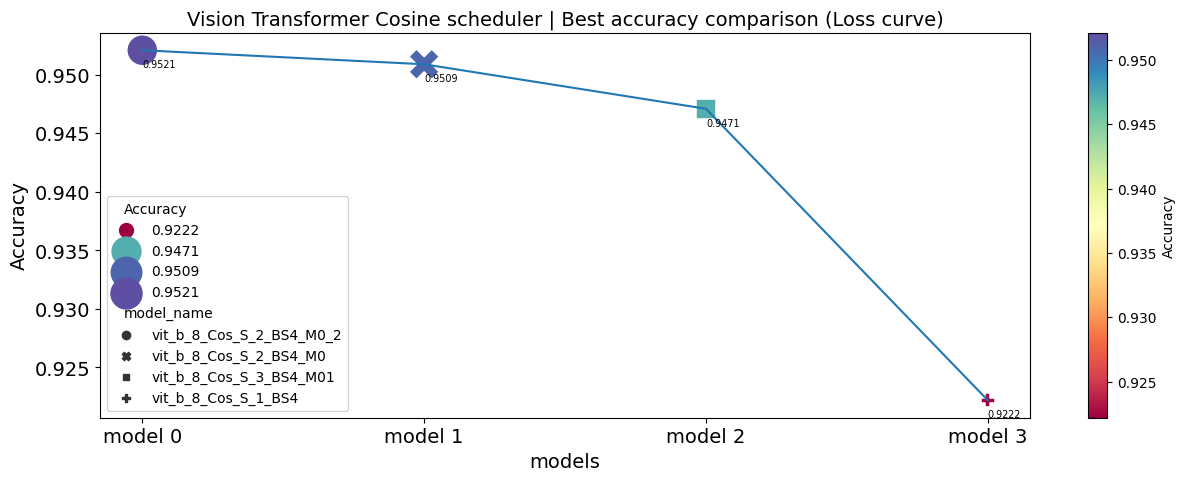

In [14]:
#plt.plot(scatter_plot_df['model'],scatter_plot_df['Accuracy'])
#
#plt.scatter(data=scatter_plot_df,x='model',
#            y='Accuracy',c='Accuracy',cmap='Greens',marker='o')
#plt.legend(scatter_plot_df['model_name'])

plt.subplots(1,1,figsize = [15,5])

cmap= sns.color_palette('Spectral', as_cmap= True)

sm = plt.cm.ScalarMappable(cmap= cmap,norm = mpl.colors.Normalize(scatter_plot_df.Accuracy.min(),
                                                                  scatter_plot_df.Accuracy.max()))
ax = sns.scatterplot(data=scatter_plot_df,
                
                
                x='model', y='Accuracy',size='Accuracy',hue='Accuracy',style='model_name',
                     palette=cmap,sizes=(100, 500))



label_point(scatter_plot_df.model, scatter_plot_df.Accuracy, scatter_plot_df['Accuracy'], ax) 
cbar = plt.colorbar(sm, ax = plt.gca())
cbar.set_label('Accuracy')
plt.title('Vision Transformer Cosine scheduler | Best accuracy comparison (Loss curve)',fontsize = 14)

plt.plot(scatter_plot_df['model'],scatter_plot_df['Accuracy'])
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.xlabel('models',fontsize = 14)
plt.ylabel('Accuracy',fontsize = 14)


plt.savefig('figures/Cos_scheduler_loss_curve.png',bbox_inches='tight')

In [181]:
wd_remaining_selected_val

[(0.9521, 'vit_b_8_Cos_S_2_BS4_M0_2'),
 (0.9509, 'vit_b_8_Cos_S_2_BS4_M0'),
 (0.9471, 'vit_b_8_Cos_S_3_BS4_M01'),
 (0.9222, 'vit_b_8_Cos_S_1_BS4')]

In [15]:
#[j.replace('0_','0.').replace('_6','').replace('base_patch','b_').replace('wd','WD_').replace('WD_h','h')) for i,j in wd_remaining_selected_val] 

Z_ = []
X_ = []
att = []
model_type= []
Y_ = []


for a,b in [(i,j.replace('0_','0.').replace('_6','').replace('base_patch','b_').replace('wd','WD_').replace('WD_h','h')) 
                for i,j in wd_remaining_selected_val]:
    b_start_c = b.find('WD_b')+len('WD_b')
    h_start = max(b.find('_h'),b.find('.h'))
    
    X_.append(float(b[b_start_c :h_start]))
    
    h = b[h_start+len('.h') :]
    if 'att' in  b[h_start+len('.h') :]:
        att.append('MHSA')
    else:
        att.append('')
        
    if '32' in b:
        model_type.append(32)
    elif '8' in b:
        model_type.append(8)
        
        
    
    h_end_index = re.search("[+-]?([0-9]*[.])?[0-9]+",h)
    h = float(h[h_end_index.start():h_end_index.end()])
    
    
    
    Y_.append(h)
    
    Z_.append(a)
    




ValueError: could not convert string to float: '_b_8_Cos_S_2_BS4_M0.'

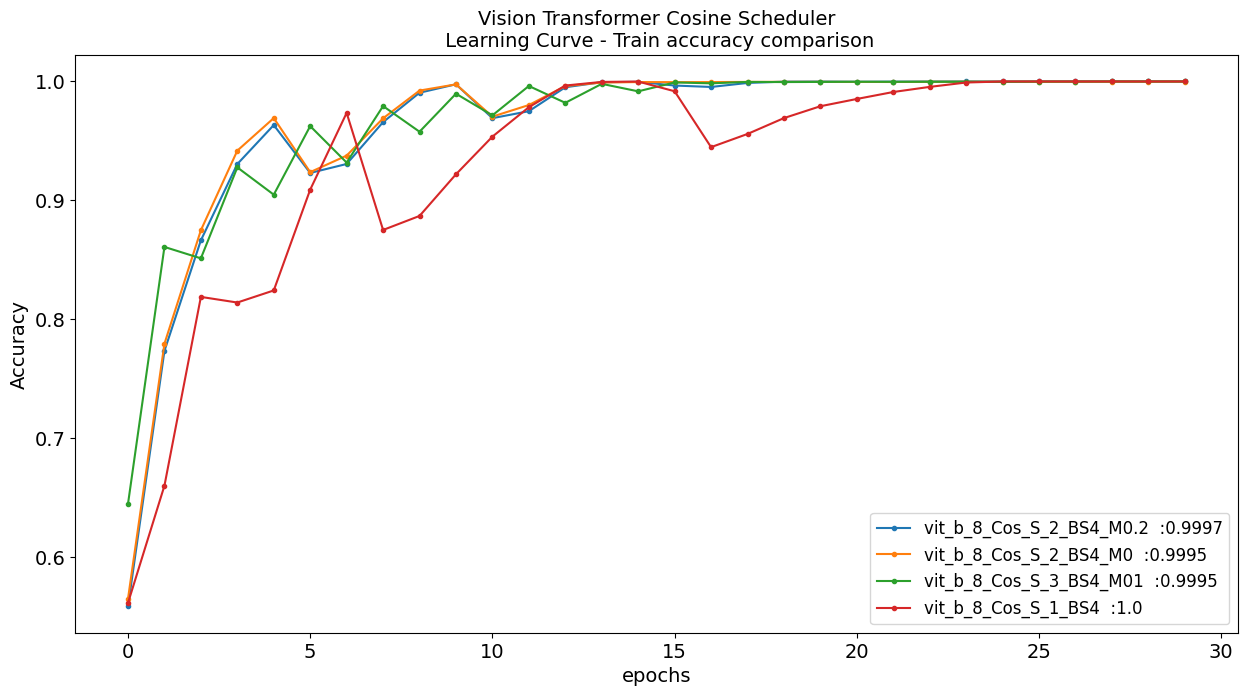

In [20]:
plt.subplots(figsize =[15,7.5])

#plt.plot(vit_b_8_WD_6_val,marker = '.',linestyle='-')

for j,i in wd_remaining_selected_val:
    
    
    
    plt.plot(dict_[i]['Accuracy/train']['value'],marker = '.',linestyle=('-'
                                                                      
                                                                      if 'b_8' in i else ':'
                                                                      ))


    
plt.legend(labels = [str(j.replace('0_','0.').replace('_6','').replace('base_patch','_b_').replace('wd','WD_').replace('WD_h','h'))+'  :'+str(
                                                                                                                                            
    
                                                                                            np.around(dict_[j]['Accuracy/train']['value'][(np.argmax(dict_[j]
                                                                                                                    ['Accuracy/val']['value']))]
                                                                                                                                             
                                                                                                                                             
                                                                                                                                             ,4)
                                                                                                                                             
                                                                                                                                             
                                                                                                                                             ) for i,j in  
                     #[(np.max(vit_b_8_WD_6_val),'vit_b_8_WD_mix',)]+
                     wd_remaining_selected_val]
          ,fontsize = 12)


plt.title('Vision Transformer Cosine Scheduler\n Learning Curve - Train accuracy comparison',fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.xlabel('epochs',fontsize = 14)
plt.ylabel('Accuracy',fontsize = 14)

plt.savefig('figures/Cos_scheduler_learning_curve_training.png',bbox_inches='tight')

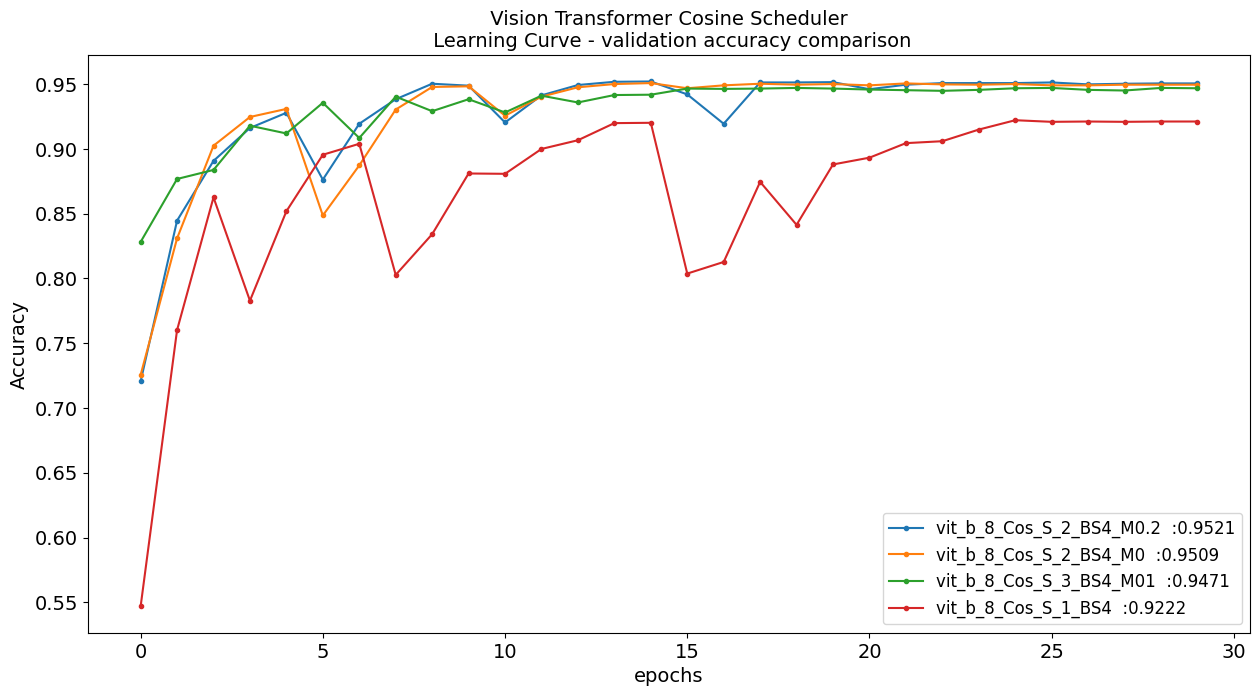

In [19]:
plt.subplots(figsize =[15,7.5])

#plt.plot(vit_b_8_WD_6_val,marker = '.',linestyle='-')

for j,i in wd_remaining_selected_val:
    
    
    
    plt.plot(dict_[i]['Accuracy/val']['value'],marker = '.',linestyle=('-'
                                                                      
                                                                      if 'b_8' in i else ':'
                                                                      ))


    
plt.legend(labels = [str(j.replace('0_','0.').replace('_6','').replace('base_patch','_b_').replace('wd','WD_').replace('WD_h','h'))+'  :'+str(i) for i,j in  
                     #[(np.max(vit_b_8_WD_6_val),'vit_b_8_WD_mix',)]+
                     wd_remaining_selected_val]
          ,fontsize = 12)


plt.title(' Vision Transformer Cosine Scheduler \n Learning Curve - validation accuracy comparison',fontsize = 14)

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('epochs',fontsize = 14)
plt.ylabel('Accuracy',fontsize = 14)

plt.savefig('figures/Cos_scheduler_learning_curve_validation.png',bbox_inches='tight')


In [159]:
#vit_b_8_WD_b0_03_h0_2, vit_b_8_WD_6_c_extended_WD_0_01_0_1_LR_0_0002_ext, 
#vit_b_8_WD_b0_03_h0_1_att_only, vit_b_8_WD_b0_01_h0_1_6, 
#vit_b_8_WD_6_b_extended_WD_0_01_0_1_LR_0_0002_ext
#vit_b_8_WD_b0_1_h0_2_att_only_M0_LR_0_001_BS_32
#vit_b_8_WD_6_extended_WD_0_01_0_1_LR_0_0002_ext
#vit_b_8_WD_b0_1_h0_2_att_only_M0_LR_0_001_BS_32_extended




[None, None, None, None, None]

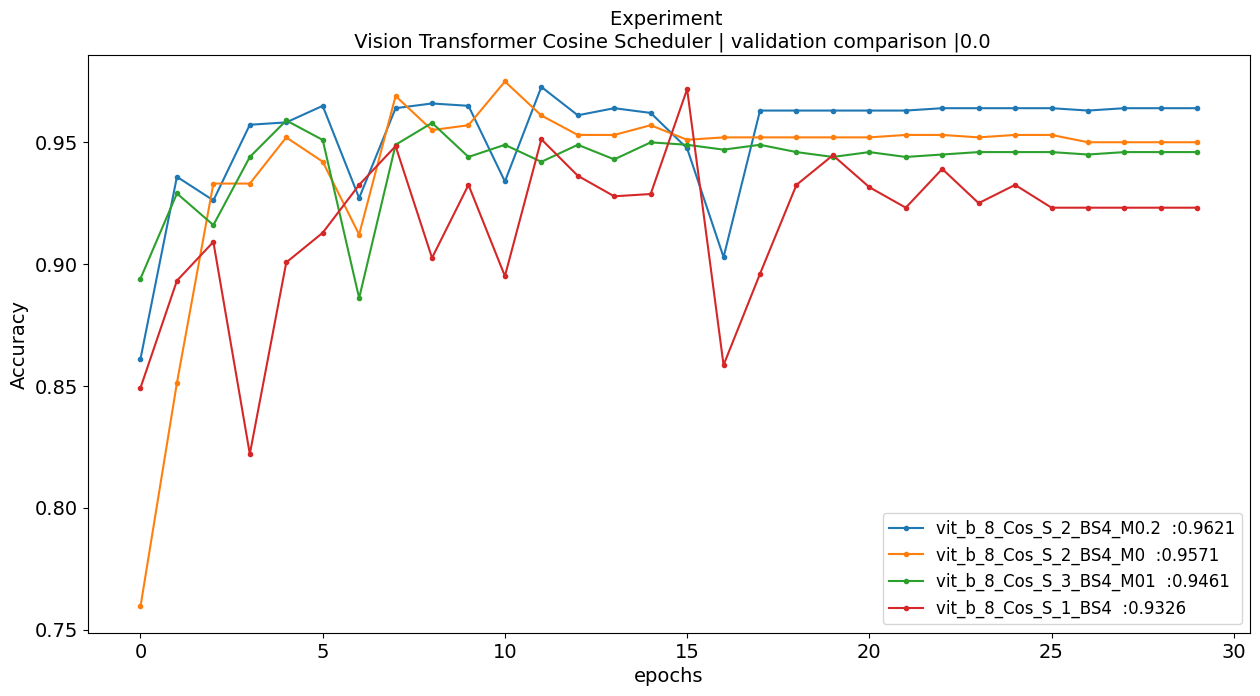

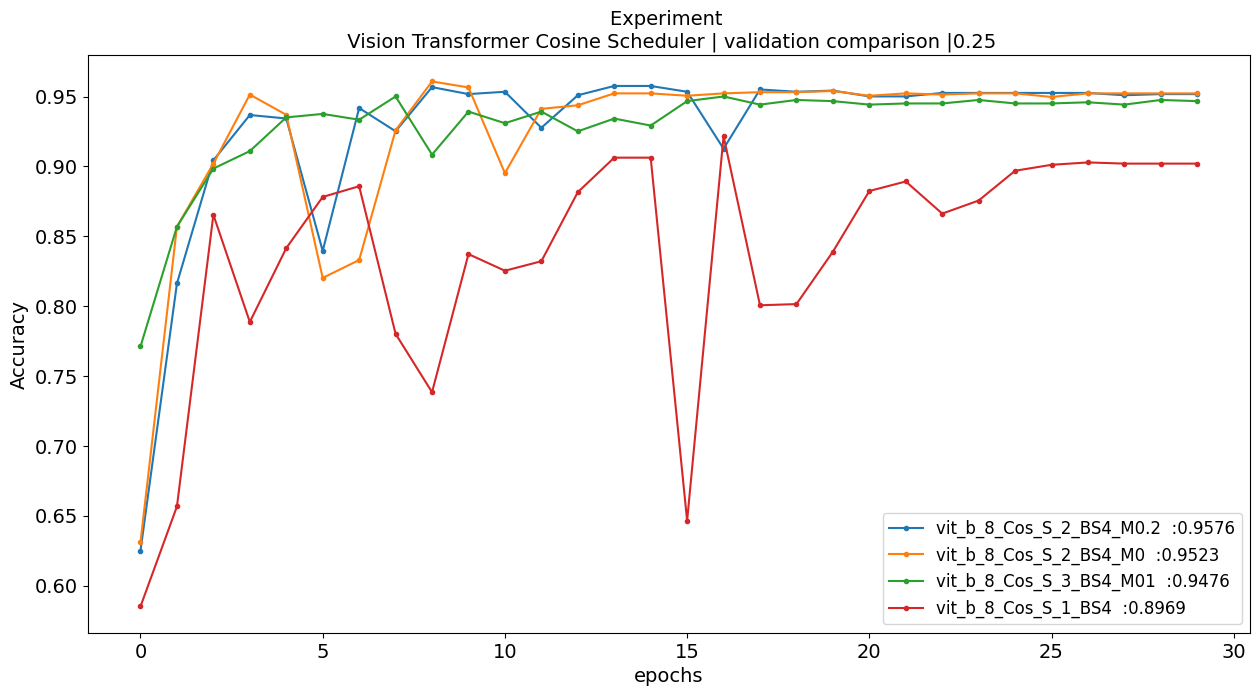

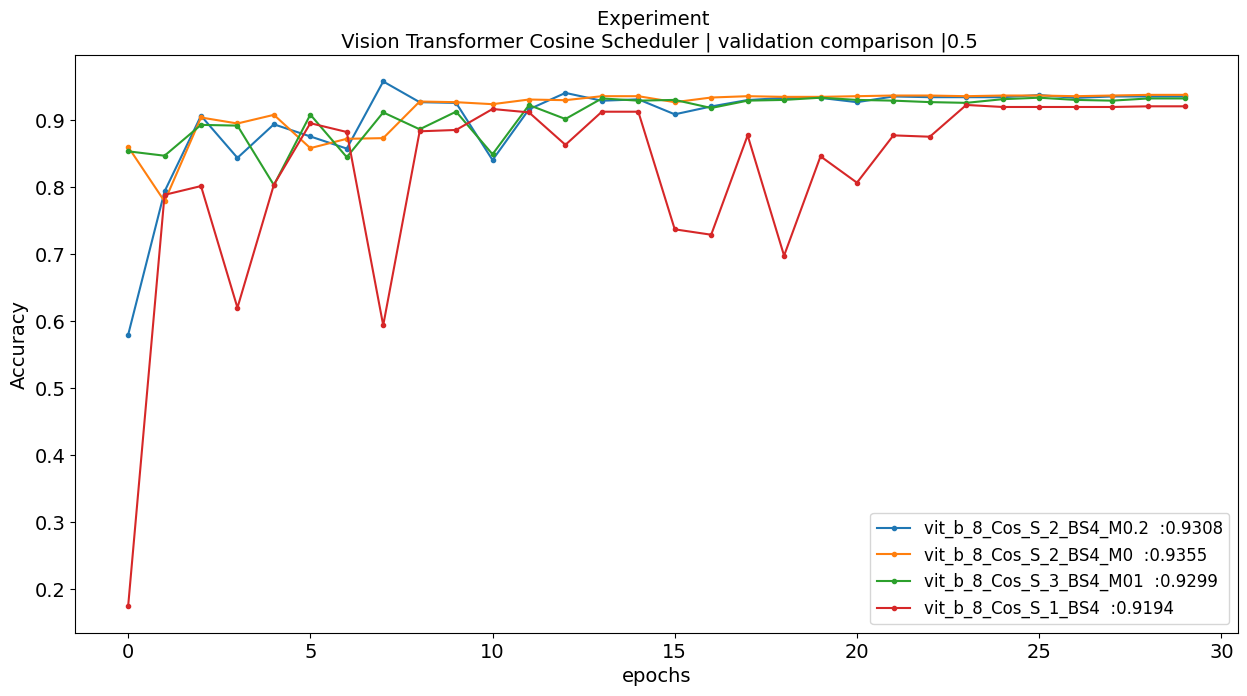

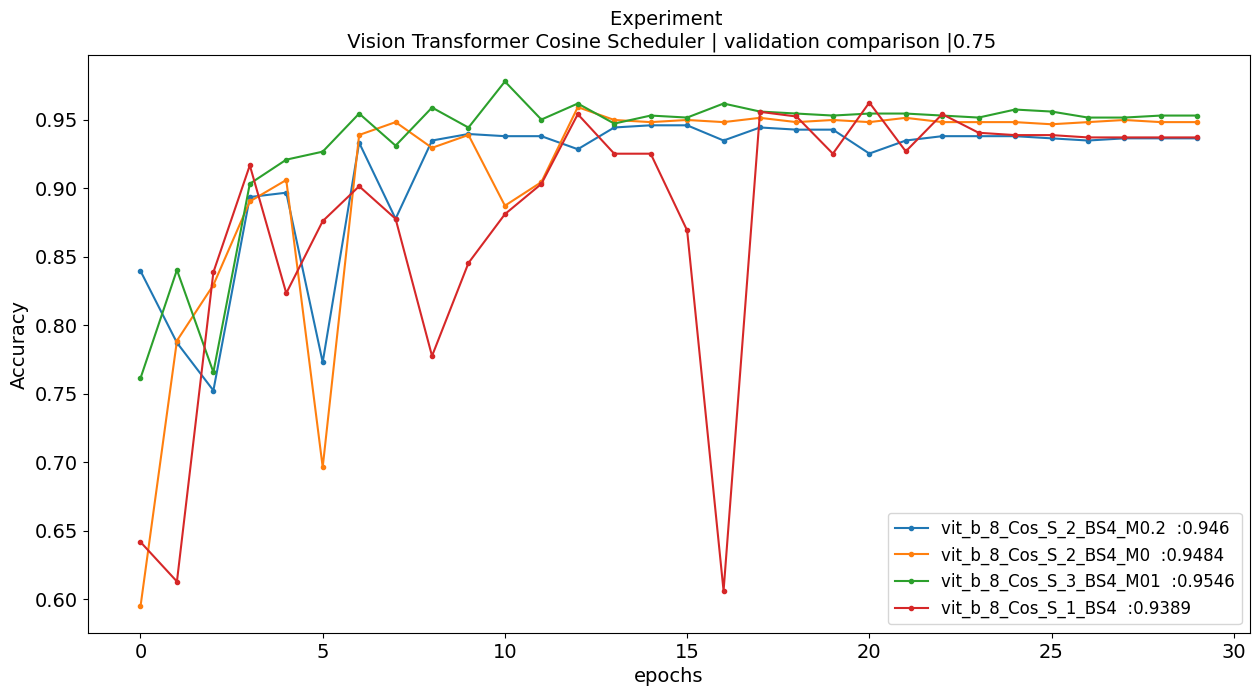

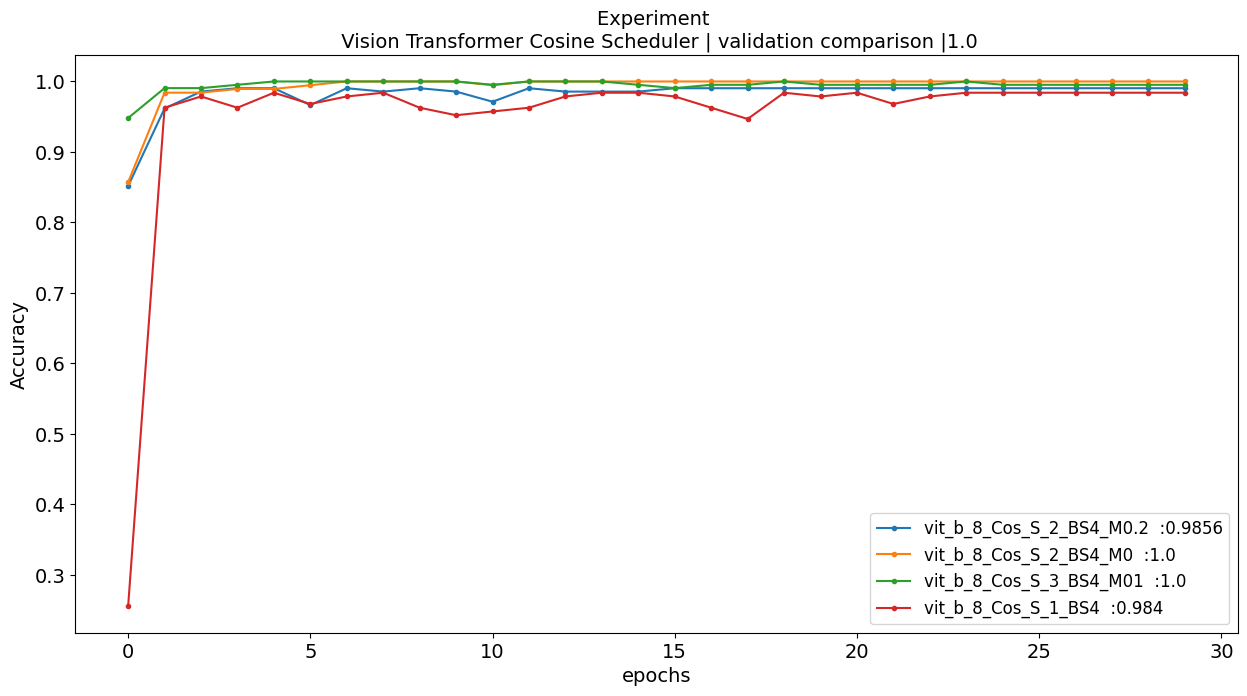

In [52]:

best_perclass_accuracy_model_dict = dict({})



for name in ['Per-Class Accuracy/0.0/val', 'Per-Class Accuracy/0.25/val',
 'Per-Class Accuracy/0.5/val', 'Per-Class Accuracy/0.75/val',
 'Per-Class Accuracy/1.0/val']:

    best_perclass_accuracy_model_dict[name]=dict({})

    plt.subplots(figsize =[15,7.5])

    #plt.plot(vit_b_8_WD_6_val,marker = '.',linestyle='-')

    for j,i in wd_remaining_selected_val:

        best_perclass_accuracy_model_dict[name][i] = np.around(dict_[i][name]['value'][(np.argmax(dict_[i]['Accuracy/val']['value']))],4)

        plt.plot(dict_[i][name]['value'],marker = '.',linestyle=('-'

                                                                          if 'b_8' in i else ':'
                                                                          ))


    
    
    plt.legend(labels = [str(j.replace('0_','0.').replace('_6','').replace('base_patch','b_').replace('wd','WD_').replace('WD_h_','h'))+'  :'+str(
                                                                                                                                            
    
                                                                                            np.around(dict_[j][name]['value'][(np.argmax(dict_[j]
                                                                                                                    ['Accuracy/val']['value']))]
                                                                                                                                             
                                                                                                                                             
                                                                                                                                             
                                                                                                                                             ,4)
                                                                                                                                             
                                                                                                                                             ) for i,j in  
                         #[(np.max(vit_b_8_WD_6_val),'vit_b_8_WD_mix',)]+
                         wd_remaining_selected_val]
              ,fontsize = 12)


    plt.title('Experiment \n Vision Transformer Cosine Scheduler | validation comparison |'+name.split("/")[1],fontsize = 14)
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.xlabel('epochs',fontsize = 14)
    plt.ylabel('Accuracy',fontsize = 14)
    
    
    plt.savefig(f'figures/Cos_scheduler_learning_curve_validation_per_class_{name.split("/")[1]}.png',bbox_inches='tight')
    plt.show()


In [22]:

Best_per_class_accuracy_df = pd.DataFrame(best_perclass_accuracy_model_dict)
Best_per_class_accuracy_df.columns = np.array([0,0.25,0.5,0.75,1],dtype=str)
Best_per_class_accuracy_df['avg_per_class'] = Best_per_class_accuracy_df.mean(1)

Best_per_class_accuracy_df.style.background_gradient(cmap='Greens',low=-0.5,
                                                                          #high=1,
                                                                          #vmin=0.8,vmax=1
                                                                         )

,0,0.25,0.5,0.75,1,avg_per_class
vit_b_8_Cos_S_2_BS4_M0_2,0.962100,0.957600,0.930800,0.946000,0.985600,0.956420
vit_b_8_Cos_S_2_BS4_M0,0.957100,0.952300,0.935500,0.948400,1.000000,0.958660
vit_b_8_Cos_S_3_BS4_M01,0.946100,0.947600,0.929900,0.954600,1.000000,0.955640
vit_b_8_Cos_S_1_BS4,0.932600,0.896900,0.919400,0.938900,0.984000,0.934360


In [50]:
model_config_df = pd.DataFrame([dict(model_name="vit_b_8_Cos_S_1_BS4",exp='1'
,lr = 0.002
,momentum = 0.9
,T_0= 1
,T_mult= 2
,multiplier= 0.75
,warmup_iters= 4000)

,dict(model_name= "vit_b_8_Cos_S_2_BS4_M0",exp='2'
,lr = 0.0005
,momentum = 0.1
,T_0= 5
,T_mult= 1
,multiplier= 0.75
,warmup_iters= 8000)

,dict(model_name= "vit_b_8_Cos_S_2_BS4_M0_2",exp='2b'
,lr = 0.0005
,momentum = 0.1
,T_0= 5
,T_mult= 1
,multiplier= 0.75
,warmup_iters= 8000)

,dict(model_name= "vit_b_8_Cos_S_3_BS4_M01",exp='3'
,lr = 0.0005
,momentum = 0.1
,T_0= 2
,T_mult= 1
,multiplier= 0.9
,warmup_iters= 2000)])


Best_per_class_accuracy_df_merged = model_config_df.merge(Best_per_class_accuracy_df.reset_index(),left_on='model_name',right_on='index').merge(scatter_plot_df.rename(columns = {'Accuracy':'Total_Accuracy'}),
                             on='model_name').drop(['model',
                                                    'model_name',
                                                    'index'],
                                                    axis =1
                            ).set_index(
                                ['exp',
                                'lr'
                                ,'momentum'
                                ,'T_0'
                                ,'T_mult'
                                ,'multiplier'
                                ,'warmup_iters'
                                ]).sort_values('Total_Accuracy',ascending = False)



In [51]:
Best_per_class_accuracy_df_merged.style.background_gradient(cmap='Greens',low=-0.5)
         
    


,,,,,,,0,0.25,0.5,0.75,1,avg_per_class,Total_Accuracy
exp,lr,momentum,T_0,T_mult,multiplier,warmup_iters,,,,,,,
2b,0.000500,0.100000,5,1,0.750000,8000,0.962100,0.957600,0.930800,0.946000,0.985600,0.956420,0.952100
2,0.000500,0.100000,5,1,0.750000,8000,0.957100,0.952300,0.935500,0.948400,1.000000,0.958660,0.950900
3,0.000500,0.100000,2,1,0.900000,2000,0.946100,0.947600,0.929900,0.954600,1.000000,0.955640,0.947100
1,0.002000,0.900000,1,2,0.750000,4000,0.932600,0.896900,0.919400,0.938900,0.984000,0.934360,0.922200
